In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import os
from pandas.core.dtypes.common import is_numeric_dtype

In [3]:
DATA_FOLDER = 'dataset'
DATASET = os.path.join(DATA_FOLDER, 'preprocessed_df.csv')
OUTLIERS_LABELLED = os.path.join(DATA_FOLDER, 'outliers_labelled.csv')
NEW_DATASET = os.path.join(DATA_FOLDER, 'final_dataset.csv')

In [4]:
df = pd.read_csv(DATASET)
numerical_attr_list = [col for col in df.columns if is_numeric_dtype(df[col])]
categorical_attr_list = [col for col in df.columns if not is_numeric_dtype(df[col])]

## LOF

In [16]:
df_sex_m = df[df['sex'] == 'M']
df_sex_f = df[df['sex'] == 'F']

df_sex_m = df_sex_m[numerical_attr_list]
df_sex_f = df_sex_f[numerical_attr_list]

In [17]:
scaler = MinMaxScaler()
X_sex_m = scaler.fit_transform(df_sex_m)
X_sex_f = scaler.fit_transform(df_sex_f)

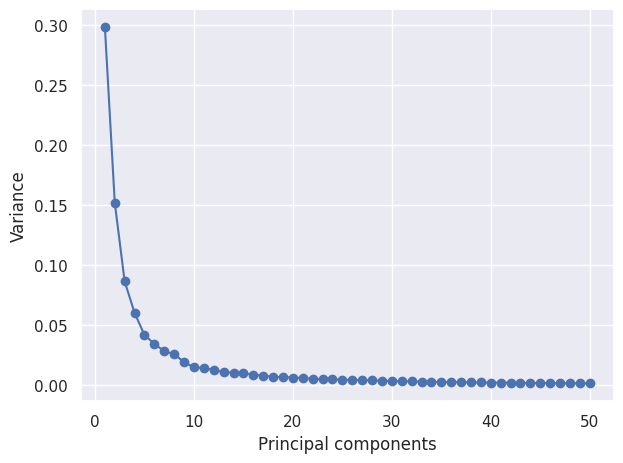

In [18]:
eigenvalues_plot(X_sex_m)

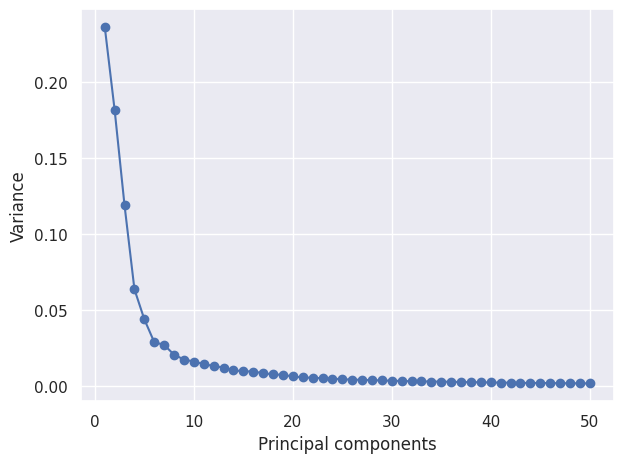

In [19]:
eigenvalues_plot(X_sex_f)

In [20]:
pca = PCA(n_components=5)
X_sex_m = pca.fit_transform(X_sex_m)
X_sex_f = pca.fit_transform(X_sex_f)

In [21]:
from sklearn.neighbors import LocalOutlierFactor

clf = LocalOutlierFactor(n_jobs=-1)
outliers = clf.fit_predict(X_sex_m)

In [22]:
np.unique(outliers, return_counts=True)

(array([-1,  1]), array([   8, 1240]))

In [23]:
df_sex_m['outlier_score'] = clf.negative_outlier_factor_

is_outlier = np.where(outliers == 1, False, True)
df_sex_m['is_outlier'] = is_outlier

In [24]:
clf = LocalOutlierFactor(n_jobs=-1)
outliers = clf.fit_predict(X_sex_f)

In [25]:
np.unique(outliers, return_counts=True)

(array([-1,  1]), array([   5, 1199]))

In [26]:
df_sex_f['outlier_score'] = clf.negative_outlier_factor_

is_outlier = np.where(outliers == 1, False, True)
df_sex_f['is_outlier'] = is_outlier

In [27]:
df_store['outlier_score_sex_lof'] = df_sex_f['outlier_score'].combine_first(df_sex_m['outlier_score'])
df_store['is_outlier_sex_lof'] = df_sex_f['is_outlier'].combine_first(df_sex_m['is_outlier'])

stored_columns += ['outlier_score_sex_lof', 'is_outlier_sex_lof']
df_store[['outlier_score_sex_lof', 'is_outlier_sex_lof']]

,outlier_score_sex_lof,is_outlier_sex_lof
0,-1.162779,False
1,-1.038021,False
2,-1.077281,False
3,-1.020366,False
4,-1.081104,False
...,...,...
2447,-0.988517,False
2448,-1.006351,False
2449,-1.010687,False
2450,-1.029462,False


In [28]:
df_speech = df[df['vocal_channel'] == 'speech']
df_song = df[df['vocal_channel'] == 'song']

df_speech = df_speech[numerical_attr_list]
df_song = df_song[numerical_attr_list]

In [29]:
X_speech = scaler.fit_transform(df_speech)
X_song = scaler.fit_transform(df_song)

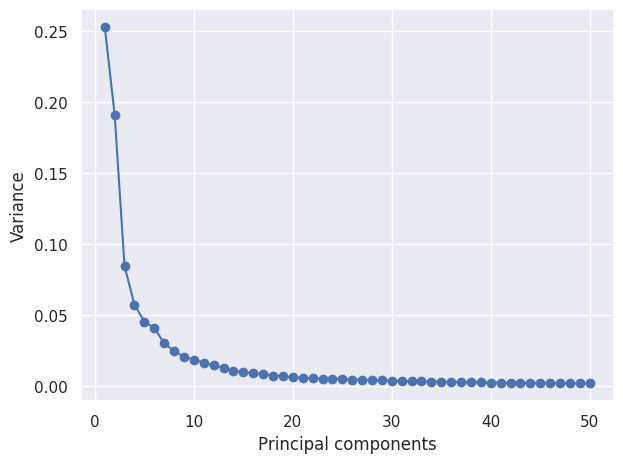

In [30]:
eigenvalues_plot(X_speech)

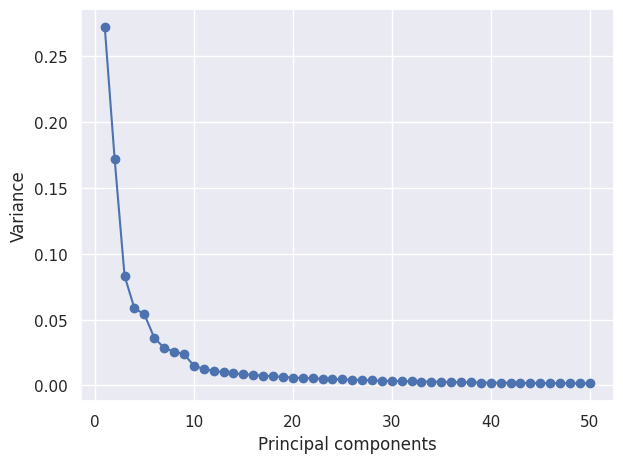

In [31]:
eigenvalues_plot(X_song)

In [32]:
pca = PCA(n_components=5)
X_speech = pca.fit_transform(X_speech)
X_song = pca.fit_transform(X_song)

In [33]:
clf = LocalOutlierFactor(n_jobs=-1)
outliers = clf.fit_predict(X_speech)

In [34]:
np.unique(outliers, return_counts=True)

(array([-1,  1]), array([   7, 1433]))

In [35]:
df_speech['outlier_score'] = clf.negative_outlier_factor_

is_outlier = np.where(outliers == 1, False, True)
df_speech['is_outlier'] = is_outlier

In [36]:
clf = LocalOutlierFactor(n_jobs=-1)
outliers = clf.fit_predict(X_song)

In [37]:
np.unique(outliers, return_counts=True)

(array([-1,  1]), array([   8, 1004]))

In [38]:
df_song['outlier_score'] = clf.negative_outlier_factor_

is_outlier = np.where(outliers == 1, False, True)
df_song['is_outlier'] = is_outlier

In [39]:
df_store['outlier_score_vc_lof'] = df_song['outlier_score'].combine_first(df_speech['outlier_score'])
df_store['is_outlier_vc_lof'] = df_song['is_outlier'].combine_first(df_speech['is_outlier'])

stored_columns += ['outlier_score_vc_lof', 'is_outlier_vc_lof']
df_store[['outlier_score_vc_lof', 'is_outlier_vc_lof']]

,outlier_score_vc_lof,is_outlier_vc_lof
0,-1.194876,False
1,-1.080909,False
2,-1.137766,False
3,-1.020083,False
4,-1.069881,False
...,...,...
2447,-1.002921,False
2448,-1.018316,False
2449,-1.029578,False
2450,-1.010099,False


#### now that all outlier scores have been calculated, it is possible to select the top 1%

In [40]:
df_outliers = df_store.loc[(df_store['is_outlier_sex_lof'] == True) | (df_store['is_outlier_vc_lof'] == True)]

In [41]:
scores = df_outliers['outlier_score_sex_lof'] + df_outliers['outlier_score_vc_lof']
scores_vc = df_outliers['outlier_score_vc_lof']
scores_sex = df_outliers['outlier_score_sex_lof']
scores

35     -2.840769
40     -2.642115
235    -2.934465
382    -3.605942
512    -2.670147
515    -2.628191
589    -3.247026
698    -3.821583
832    -3.782130
841    -2.998259
843    -3.169814
903    -2.974454
1176   -2.700379
1283   -2.731851
1390   -3.162697
1756   -2.910176
1757   -3.074569
1877   -2.991212
1878   -2.708614
2210   -2.969697
2287   -2.958662
2392   -4.248095
dtype: float64

In [42]:
# find top 1% outliers
one_percent = int(df.shape[0] / 100)

top1pct_outliers_sex_lof = scores_sex.nsmallest(one_percent)
top1pct_outliers_vc_lof = scores_vc.nsmallest(one_percent)
top1pct_outliers_lof = scores.nsmallest(one_percent)
top1pct_outliers_lof

2392   -4.248095
698    -3.821583
832    -3.782130
382    -3.605942
589    -3.247026
843    -3.169814
1390   -3.162697
1757   -3.074569
841    -2.998259
1877   -2.991212
903    -2.974454
2210   -2.969697
2287   -2.958662
235    -2.934465
1756   -2.910176
35     -2.840769
1283   -2.731851
1878   -2.708614
1176   -2.700379
512    -2.670147
40     -2.642115
515    -2.628191
dtype: float64

## Isolation Forest

In [43]:
df_sex_m = df[df['sex'] == 'M']
df_sex_f = df[df['sex'] == 'F']

df_sex_m = df_sex_m[numerical_attr_list]
df_sex_f = df_sex_f[numerical_attr_list]

In [44]:
X_sex_m = scaler.fit_transform(df_sex_m)
X_sex_f = scaler.fit_transform(df_sex_f)

In [45]:
from sklearn.ensemble import IsolationForest

isfo = IsolationForest(n_jobs=-1)
outliers = isfo.fit_predict(X_sex_m)

In [46]:
np.unique(outliers, return_counts=True)

(array([-1,  1]), array([  70, 1178]))

In [47]:
df_sex_m['outlier_score'] = isfo.score_samples(X_sex_m)

is_outlier = np.where(outliers == 1, False, True)
df_sex_m['is_outlier'] = is_outlier

In [48]:
isfo = IsolationForest(n_jobs=-1)
outliers = isfo.fit_predict(X_sex_f)

In [49]:
np.unique(outliers, return_counts=True)

(array([-1,  1]), array([  52, 1152]))

In [50]:
df_sex_f['outlier_score'] = isfo.score_samples(X_sex_f)

is_outlier = np.where(outliers == 1, False, True)
df_sex_f['is_outlier'] = is_outlier

In [51]:
df_store['outlier_score_sex_isfo'] = df_sex_f['outlier_score'].combine_first(df_sex_m['outlier_score'])
df_store['is_outlier_sex_isfo'] = df_sex_f['is_outlier'].combine_first(df_sex_m['is_outlier'])

stored_columns += ['outlier_score_sex_isfo', 'is_outlier_sex_isfo']
df_store[['outlier_score_sex_isfo', 'is_outlier_sex_isfo']]

,outlier_score_sex_isfo,is_outlier_sex_isfo
0,-0.481726,False
1,-0.453292,False
2,-0.439438,False
3,-0.441223,False
4,-0.437649,False
...,...,...
2447,-0.382916,False
2448,-0.402176,False
2449,-0.391537,False
2450,-0.395915,False


In [52]:
df_speech = df[df['vocal_channel'] == 'speech']
df_song = df[df['vocal_channel'] == 'song']

df_speech = df_speech[numerical_attr_list]
df_song = df_song[numerical_attr_list]

In [53]:
X_speech = scaler.fit_transform(df_speech)
X_song = scaler.fit_transform(df_song)

In [54]:
isfo = IsolationForest(n_jobs=-1)
outliers = isfo.fit_predict(X_speech)

In [55]:
np.unique(outliers, return_counts=True)

(array([-1,  1]), array([  67, 1373]))

In [56]:
df_speech['outlier_score'] = isfo.score_samples(X_speech)

is_outlier = np.where(outliers == 1, False, True)
df_speech['is_outlier'] = is_outlier

In [57]:
isfo = IsolationForest(n_jobs=-1)
outliers = isfo.fit_predict(X_song)

In [58]:
np.unique(outliers, return_counts=True)

(array([-1,  1]), array([ 44, 968]))

In [59]:
df_song['outlier_score'] = isfo.score_samples(X_song)

is_outlier = np.where(outliers == 1, False, True)
df_song['is_outlier'] = is_outlier

In [60]:
df_store['outlier_score_vc_isfo'] = df_speech['outlier_score'].combine_first(df_song['outlier_score'])
df_store['is_outlier_vc_isfo'] = df_speech['is_outlier'].combine_first(df_song['is_outlier'])

stored_columns += ['outlier_score_vc_isfo', 'is_outlier_vc_isfo']
df_store[['outlier_score_vc_isfo', 'is_outlier_vc_isfo']]

,outlier_score_vc_isfo,is_outlier_vc_isfo
0,-0.474489,False
1,-0.410051,False
2,-0.430983,False
3,-0.417034,False
4,-0.416472,False
...,...,...
2447,-0.396978,False
2448,-0.402677,False
2449,-0.415545,False
2450,-0.418129,False


#### now that all outlier scores have been calculated, it is possible to select the top 1%

In [61]:
df_outliers = df_store.loc[(df_store['is_outlier_sex_isfo'] == True) | (df_store['is_outlier_vc_isfo'] == True)]

In [62]:
scores = df_outliers['outlier_score_sex_isfo'] + df_outliers['outlier_score_vc_isfo']
scores_vc = df_outliers['outlier_score_vc_isfo']
scores_sex = df_outliers['outlier_score_sex_isfo']
scores

32     -1.069905
33     -1.029127
34     -1.002197
35     -1.220774
40     -1.003520
          ...   
2130   -1.011177
2131   -0.997850
2210   -1.021942
2261   -0.922988
2392   -0.968272
Length: 147, dtype: float64

In [63]:
# find top 1% outliers
one_percent = int(df.shape[0] / 100)

top1pct_outliers_sex_isfo = scores_sex.nsmallest(one_percent)
top1pct_outliers_vc_isfo = scores_vc.nsmallest(one_percent)
top1pct_outliers_isfo = scores.nsmallest(one_percent)
top1pct_outliers_isfo

35     -1.220774
1862   -1.183951
563    -1.171854
1283   -1.167242
1801   -1.165870
1759   -1.154896
554    -1.148696
561    -1.148008
1973   -1.146485
1756   -1.146161
243    -1.145381
1757   -1.144735
560    -1.138176
1704   -1.133411
1861   -1.124804
249    -1.121247
1975   -1.119802
1758   -1.112964
657    -1.109140
241    -1.107490
1031   -1.100760
659    -1.099198
552    -1.092837
553    -1.091153
dtype: float64

## ABOD

In [64]:
df_sex_m = df[df['sex'] == 'M']
df_sex_f = df[df['sex'] == 'F']

df_sex_m = df_sex_m[numerical_attr_list]
df_sex_f = df_sex_f[numerical_attr_list]

In [65]:
X_sex_m = scaler.fit_transform(df_sex_m)
X_sex_f = scaler.fit_transform(df_sex_f)

In [66]:
from pyod.models.abod import ABOD

abod = ABOD()
outliers = abod.fit_predict(X_sex_m)

/home/djanloo/.virtualenvs/DM2-PeqFRmfa/lib/python3.10/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)


In [67]:
np.unique(outliers, return_counts=True)

(array([0, 1]), array([1123,  125]))

In [68]:
df_sex_m['outlier_score'] = abod.decision_scores_

# using ABOD, 1 -> outlier && 0 -> inlier
is_outlier = np.where(outliers == 1, True, False)
df_sex_m['is_outlier'] = is_outlier

In [69]:
abod = ABOD()
outliers = abod.fit_predict(X_sex_f)

/home/djanloo/.virtualenvs/DM2-PeqFRmfa/lib/python3.10/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)


In [70]:
np.unique(outliers, return_counts=True)

(array([0, 1]), array([1083,  121]))

In [71]:
df_sex_f['outlier_score'] = abod.decision_scores_

# using ABOD, 1 -> outlier && 0 -> inlier
is_outlier = np.where(outliers == 1, True, False)
df_sex_f['is_outlier'] = is_outlier

In [72]:
df_store['outlier_score_sex_abod'] = df_sex_f['outlier_score'].combine_first(df_sex_m['outlier_score'])
df_store['is_outlier_sex_abod'] = df_sex_f['is_outlier'].combine_first(df_sex_m['is_outlier'])

stored_columns += ['outlier_score_sex_abod', 'is_outlier_sex_abod']
df_store[['outlier_score_sex_abod', 'is_outlier_sex_abod']]

,outlier_score_sex_abod,is_outlier_sex_abod
0,-0.000272,True
1,-0.005159,False
2,-0.025919,False
3,-0.006972,False
4,-0.002715,False
...,...,...
2447,-0.035669,False
2448,-0.017515,False
2449,-0.007905,False
2450,-0.005445,False


In [73]:
df_speech = df[df['vocal_channel'] == 'speech']
df_song = df[df['vocal_channel'] == 'song']

df_speech = df_speech[numerical_attr_list]
df_song = df_song[numerical_attr_list]

In [74]:
X_speech = scaler.fit_transform(df_speech)
X_song = scaler.fit_transform(df_song)

In [75]:
abod = ABOD()
outliers = abod.fit_predict(X_speech)

/home/djanloo/.virtualenvs/DM2-PeqFRmfa/lib/python3.10/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)


In [76]:
np.unique(outliers, return_counts=True)

(array([0, 1]), array([1296,  144]))

In [77]:
df_speech['outlier_score'] = abod.decision_scores_

# using ABOD, 1 -> outlier && 0 -> inlier
is_outlier = np.where(outliers == 1, True, False)
df_speech['is_outlier'] = is_outlier

In [78]:
abod = ABOD()
outliers = abod.fit_predict(X_song)

/home/djanloo/.virtualenvs/DM2-PeqFRmfa/lib/python3.10/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)


In [79]:
np.unique(outliers, return_counts=True)

(array([0, 1]), array([910, 102]))

In [80]:
df_song['outlier_score'] = abod.decision_scores_

# using ABOD, 1 -> outlier && 0 -> inlier
is_outlier = np.where(outliers == 1, True, False)
df_song['is_outlier'] = is_outlier

In [81]:
df_store['outlier_score_vc_abod'] = df_speech['outlier_score'].combine_first(df_song['outlier_score'])
df_store['is_outlier_vc_abod'] = df_speech['is_outlier'].combine_first(df_song['is_outlier'])

stored_columns += ['outlier_score_vc_abod', 'is_outlier_vc_abod']
df_store[['outlier_score_vc_abod', 'is_outlier_vc_abod']]

,outlier_score_vc_abod,is_outlier_vc_abod
0,-0.002171,False
1,-0.010967,False
2,-0.024170,False
3,-0.011800,False
4,-0.011233,False
...,...,...
2447,-0.022206,False
2448,-0.008860,False
2449,-0.003232,False
2450,-0.004058,False


#### now that all outlier scores have been calculated, it is possible to select the top 1%

In [82]:
df_outliers = df_store.loc[(df_store['is_outlier_sex_abod'] == True) | (df_store['is_outlier_vc_abod'] == True)]

In [83]:
scores = df_outliers['outlier_score_sex_abod'] + df_outliers['outlier_score_vc_abod']
scores_vc = df_outliers['outlier_score_vc_abod']
scores_sex = df_outliers['outlier_score_sex_abod']
scores

0      -0.002443
8      -0.003400
13     -0.005057
17     -0.003363
32     -0.002482
          ...   
2425   -0.003687
2426   -0.002269
2437   -0.002124
2440   -0.002044
2443   -0.002981
Length: 338, dtype: float64

In [84]:
# find top 1% outliers
one_percent = int(df.shape[0] / 100)
# using ABOD the larger the value, the more abnormal the data
top1pct_outliers_sex_abod = scores_sex.nlargest(one_percent)
top1pct_outliers_vc_abod = scores_vc.nlargest(one_percent)
top1pct_outliers_abod = scores.nlargest(one_percent)
top1pct_outliers_abod

2392   -0.000173
841    -0.000336
352    -0.000382
927    -0.000425
2375   -0.000464
1283   -0.000539
292    -0.000589
1738   -0.000590
546    -0.000613
1367   -0.000652
1862   -0.000679
1968   -0.000691
35     -0.000696
1177   -0.000794
698    -0.000809
2336   -0.000814
92     -0.000818
842    -0.000840
361    -0.000907
1982   -0.000917
1878   -0.000924
955    -0.000927
1702   -0.000956
1496   -0.000972
dtype: float64

In [85]:
df_store.to_csv(OUTLIERS_LABELLED, index=False)

## Compare the outliers obtained by the three different methods

In [86]:
display(top1pct_outliers_lof, top1pct_outliers_sex_lof, top1pct_outliers_vc_lof)

2392   -4.248095
698    -3.821583
832    -3.782130
382    -3.605942
589    -3.247026
843    -3.169814
1390   -3.162697
1757   -3.074569
841    -2.998259
1877   -2.991212
903    -2.974454
2210   -2.969697
2287   -2.958662
235    -2.934465
1756   -2.910176
35     -2.840769
1283   -2.731851
1878   -2.708614
1176   -2.700379
512    -2.670147
40     -2.642115
515    -2.628191
dtype: float64

2392   -2.256192
832    -1.855750
382    -1.830522
698    -1.701651
589    -1.668554
1877   -1.654060
35     -1.570692
1176   -1.566029
1878   -1.555404
40     -1.528668
1390   -1.522319
1283   -1.520909
1756   -1.512145
841    -1.494743
2210   -1.417029
903    -1.408688
1757   -1.404169
235    -1.356046
843    -1.350353
2287   -1.248860
512    -1.162856
515    -0.988996
Name: outlier_score_sex_lof, dtype: float64

698    -2.119932
2392   -1.991903
832    -1.926380
843    -1.819461
382    -1.775420
2287   -1.709802
1757   -1.670400
1390   -1.640378
515    -1.639195
589    -1.578472
235    -1.578419
903    -1.565766
2210   -1.552668
512    -1.507291
841    -1.503516
1756   -1.398031
1877   -1.337152
35     -1.270077
1283   -1.210942
1878   -1.153210
1176   -1.134350
40     -1.113447
Name: outlier_score_vc_lof, dtype: float64

In [87]:
display(top1pct_outliers_isfo, top1pct_outliers_sex_isfo, top1pct_outliers_vc_isfo)

35     -1.220774
1862   -1.183951
563    -1.171854
1283   -1.167242
1801   -1.165870
1759   -1.154896
554    -1.148696
561    -1.148008
1973   -1.146485
1756   -1.146161
243    -1.145381
1757   -1.144735
560    -1.138176
1704   -1.133411
1861   -1.124804
249    -1.121247
1975   -1.119802
1758   -1.112964
657    -1.109140
241    -1.107490
1031   -1.100760
659    -1.099198
552    -1.092837
553    -1.091153
dtype: float64

35     -0.620653
1704   -0.593595
1283   -0.587706
1801   -0.585618
1703   -0.574122
1862   -0.569542
1756   -0.565065
249    -0.561973
563    -0.559475
1757   -0.557744
560    -0.557577
243    -0.557250
1861   -0.555160
1177   -0.552947
1759   -0.552191
554    -0.549332
1973   -0.548389
1975   -0.547248
561    -0.546395
1029   -0.545136
659    -0.545112
1705   -0.544449
657    -0.544095
1031   -0.543597
Name: outlier_score_sex_isfo, dtype: float64

1862   -0.614409
563    -0.612380
1759   -0.602705
561    -0.601613
35     -0.600121
554    -0.599365
1973   -0.598096
243    -0.588132
1757   -0.586991
1756   -0.581096
560    -0.580599
1801   -0.580252
1283   -0.579536
241    -0.575747
1758   -0.574866
1975   -0.572553
1861   -0.569644
657    -0.565045
249    -0.559274
1031   -0.557163
552    -0.556846
240    -0.556528
659    -0.554086
866    -0.552645
Name: outlier_score_vc_isfo, dtype: float64

In [88]:
display(top1pct_outliers_abod, top1pct_outliers_sex_abod, top1pct_outliers_vc_abod)

2392   -0.000173
841    -0.000336
352    -0.000382
927    -0.000425
2375   -0.000464
1283   -0.000539
292    -0.000589
1738   -0.000590
546    -0.000613
1367   -0.000652
1862   -0.000679
1968   -0.000691
35     -0.000696
1177   -0.000794
698    -0.000809
2336   -0.000814
92     -0.000818
842    -0.000840
361    -0.000907
1982   -0.000917
1878   -0.000924
955    -0.000927
1702   -0.000956
1496   -0.000972
dtype: float64

2392   -0.000081
1177   -0.000109
2383   -0.000116
841    -0.000164
92     -0.000188
1283   -0.000211
2269   -0.000218
546    -0.000223
2375   -0.000239
352    -0.000254
955    -0.000272
0      -0.000272
223    -0.000291
927    -0.000293
292    -0.000325
878    -0.000328
1367   -0.000330
1982   -0.000348
1862   -0.000356
1241   -0.000358
1047   -0.000370
2336   -0.000371
1968   -0.000377
361    -0.000380
Name: outlier_score_sex_abod, dtype: float64

2392   -0.000092
1738   -0.000113
2032   -0.000122
352    -0.000128
927    -0.000132
841    -0.000172
934    -0.000186
2375   -0.000224
698    -0.000230
292    -0.000265
1968   -0.000314
35     -0.000315
1206   -0.000320
1367   -0.000322
1862   -0.000323
1283   -0.000328
2008   -0.000346
2035   -0.000350
614    -0.000356
1861   -0.000381
842    -0.000385
546    -0.000390
1878   -0.000402
923    -0.000403
Name: outlier_score_vc_abod, dtype: float64

In [89]:
df_store[stored_columns]

,outlier_score_sex_lof,is_outlier_sex_lof,outlier_score_vc_lof,is_outlier_vc_lof,outlier_score_sex_isfo,is_outlier_sex_isfo,outlier_score_vc_isfo,is_outlier_vc_isfo,outlier_score_sex_abod,is_outlier_sex_abod,outlier_score_vc_abod,is_outlier_vc_abod
0,-1.162779,False,-1.194876,False,-0.481726,False,-0.474489,False,-0.000272,True,-0.002171,False
1,-1.038021,False,-1.080909,False,-0.453292,False,-0.410051,False,-0.005159,False,-0.010967,False
2,-1.077281,False,-1.137766,False,-0.439438,False,-0.430983,False,-0.025919,False,-0.024170,False
3,-1.020366,False,-1.020083,False,-0.441223,False,-0.417034,False,-0.006972,False,-0.011800,False
4,-1.081104,False,-1.069881,False,-0.437649,False,-0.416472,False,-0.002715,False,-0.011233,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2447,-0.988517,False,-1.002921,False,-0.382916,False,-0.396978,False,-0.035669,False,-0.022206,False
2448,-1.006351,False,-1.018316,False,-0.402176,False,-0.402677,False,-0.017515,False,-0.008860,False
2449,-1.010687,False,-1.029578,False,-0.391537,False,-0.415545,False,-0.007905,False,-0.003232,False
2450,-1.029462,False,-1.010099,False,-0.395915,False,-0.418129,False,-0.005445,False,-0.004058,False


In [90]:
df_store['sum_scores_sex'] = df_store['outlier_score_sex_lof'] + \
                             df_store['outlier_score_sex_isfo'] - \
                             df_store['outlier_score_sex_abod'] # substract because the larger the more abnormal

df_store['sum_scores_vc'] = df_store['outlier_score_vc_lof'] + \
                             df_store['outlier_score_vc_isfo'] - \
                             df_store['outlier_score_vc_abod'] # substract because the larger the more abnormal

top1pct_sum_sex = df_store['sum_scores_sex'].nsmallest(one_percent)
top1pct_sum_vc = df_store['sum_scores_vc'].nsmallest(one_percent)

In [91]:
common_outliers_lof_isfo = list(
    top1pct_outliers_lof.index.intersection(top1pct_outliers_isfo.index)
)
common_outliers_lof_isfo

[1757, 1756, 35, 1283]

In [92]:
common_outliers_lof_abod = list(
    top1pct_outliers_lof.index.intersection(top1pct_outliers_abod.index)
)
common_outliers_lof_abod

[2392, 698, 841, 35, 1283, 1878]

In [93]:
common_outliers_abod_isfo = list(
    top1pct_outliers_abod.index.intersection(top1pct_outliers_isfo.index)
)
common_outliers_abod_isfo

[1283, 1862, 35]

In [94]:
common_outliers_sums = list(
    top1pct_sum_sex.index.intersection(top1pct_sum_vc.index)
)
common_outliers_sums

[2392, 832, 382, 589, 698, 1756, 841, 1390, 1757, 1702]

In [95]:
union = list(
    set(common_outliers_lof_abod + common_outliers_lof_isfo + common_outliers_abod_isfo + common_outliers_sums)
)
union

[832, 35, 1283, 1862, 1702, 841, 589, 1390, 1878, 2392, 698, 1756, 1757, 382]

In [96]:
common_isfo = list(top1pct_outliers_vc_isfo.index.intersection(top1pct_outliers_sex_isfo.index))
len(common_isfo)

19

In [97]:
common_lof = list(top1pct_outliers_vc_lof.index.intersection(top1pct_outliers_sex_lof.index))
len(common_lof) # very solid!

22

In [98]:
common_abod = list(top1pct_outliers_vc_abod.index.intersection(top1pct_outliers_sex_abod.index))
len(common_abod)

11

In [99]:
common = list(set(common_isfo + common_lof + common_abod))
len(common)

44

In [100]:
df = df.drop(common)

## Final comparison

In [101]:
class MyLOF(LocalOutlierFactor):
    def __init__(self, **kwargs):
        self.name = "LOF"
        super().__init__(**kwargs)

    @property
    def scores(self): return self.negative_outlier_factor_

class MyABOD(ABOD):
    def __init__(self, **kwargs):
        self.name = "ABOD"
        super().__init__(**kwargs)

    @property
    def scores(self): return self.decision_scores_

class MyISFO(IsolationForest):
    def __init__(self, **kwargs):
        self.name = "ISFO"
        super().__init__(**kwargs)

    def fit(self, X):
        self._train_samp = X
        return super().fit(X)
    
    @property
    def scores(self): return self.score_samples(self._train_samp)

In [114]:
methods = [MyLOF, MyABOD, MyISFO]
params = [dict(n_jobs=-1), dict(), dict(n_jobs=-1)]
# The sub-samples in which teh dataset is divided
# Currently the ODis performed on each element of (vocal_channel, sex) product category
locality_areas = []
for vc in ["song", "speech"]:
    for s in ["M","F"]:
        locality_areas.append(dict(vocal_channel=vc, sex=s))

scores = []
for meth, pars in zip(methods, params):
    for locality in locality_areas:
        mask = np.array([(df[key] == val).values for key, val in locality.items()]).all(axis=0)
        subsamp = MinMaxScaler().fit_transform( df.loc[mask][numerical_attr_list].values )
        outlier_detector = meth(**pars)
        outlier_detector.fit(subsamp)
        df.loc[mask, f"{outlier_detector.name}_score"] = outlier_detector.scores
        bad_kids = np.linspace(0,1, np.sum(mask))[np.argsort(outlier_detector.scores)] > 0.99
        df.loc[mask, f"is_{outlier_detector.name}_outlier"] = bad_kids

In [ ]:
for meth in methods:
    for cat in 

## Save results

In [110]:
df = df.reset_index(drop=True)
df.to_csv(NEW_DATASET, index=False)